In [2]:
import pandas as pd
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')
fake_df['label'] = 'fake'
true_df['label'] = 'true'


In [3]:
combined_df = pd.concat([fake_df, true_df], ignore_index=True)


In [4]:
print(combined_df.shape)
print(combined_df.head())
print(combined_df.tail())
print(combined_df['label'].value_counts())


(44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
                                                   title  \
44893  'Fully committed' NATO bac

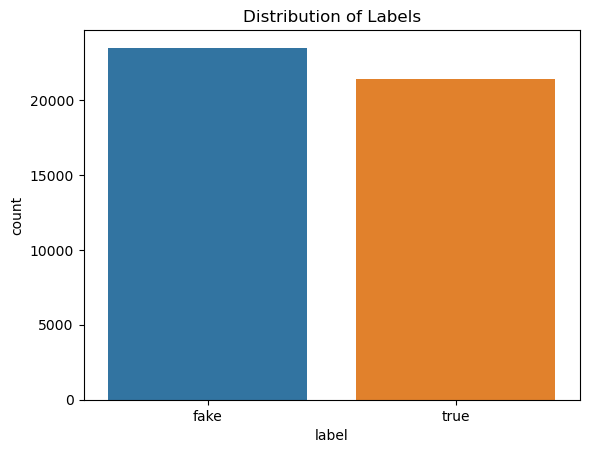

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Labels')
plt.show()


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
combined_df['clean_text'] = combined_df['text'].apply(preprocess_text)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(combined_df['clean_text'])
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (44898, 5000)
